# Learning from Data

## Perceptron Learning Algorithm

In [1]:
# Load relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb 
np.random.seed(42)

In [2]:
# Load the data
fullData = pd.read_csv('data/monthlyData.csv')

# Play around with the data; check shape, summary. Pandas has several handy features
fullData.shape
fullData.head()
fullData.describe() 

,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,...,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip,labels
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.891348,13.879213,15.934607,18.240562,20.159438,21.344382,22.008483,21.940899,20.757416,18.703876,...,9.925601,10.704169,11.217910,11.423506,10.712607,10.051135,8.824247,8.322826,112.720112,1.825843
std,13.299056,12.969427,11.428720,9.371599,7.634308,6.695327,6.184907,6.021889,6.720061,8.431828,...,8.603689,10.159223,11.013314,11.016629,10.199912,9.310305,7.904395,7.747951,79.520043,0.931559
min,-27.000000,-24.720000,-18.720000,-14.250000,-6.320000,0.080000,2.020000,2.580000,-2.340000,-8.360000,...,0.022000,0.001000,0.000000,0.012000,0.000000,0.023000,0.002000,0.000000,3.291000,0.000000
25%,0.145000,2.095000,5.267500,9.687500,14.052500,16.365000,18.050000,18.457500,15.330000,10.847500,...,3.070500,2.808000,2.377500,2.367250,2.695500,3.571000,3.051500,2.026000,54.702000,1.000000
50%,19.255000,20.495000,21.995000,22.030000,21.910000,22.995000,22.975000,23.315000,22.600000,22.495000,...,7.421000,7.630000,7.471500,7.625000,6.733000,6.978500,6.862500,5.648000,99.803000,2.000000
75%,24.237500,24.820000,25.335000,25.635000,25.895000,26.017500,26.055000,26.057500,25.775000,25.327500,...,15.317250,16.835500,17.256250,18.148500,17.811500,14.133750,11.809250,12.616750,164.357000,2.000000
max,27.780000,29.090000,30.630000,32.050000,33.060000,34.720000,36.250000,35.880000,32.780000,29.550000,...,45.963000,44.314000,48.772000,51.926000,41.120000,46.044000,36.583000,34.991000,326.827000,3.000000


### Load annual temperature and annual precipitation columns along with the labels (tropical)

In [3]:
# Make a small dataset
smallData = fullData[["ISO_3DIGIT","Annual_temp", "Annual_precip", "tropical"]]

In [4]:
# Use first 100 countries as training data
trainData = smallData[:100]

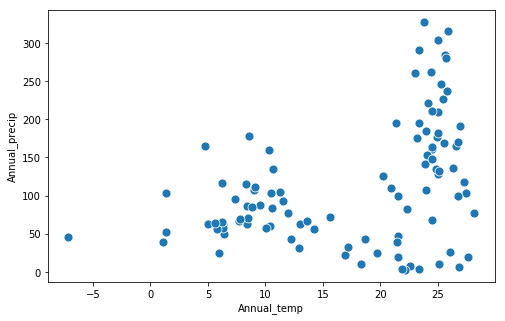

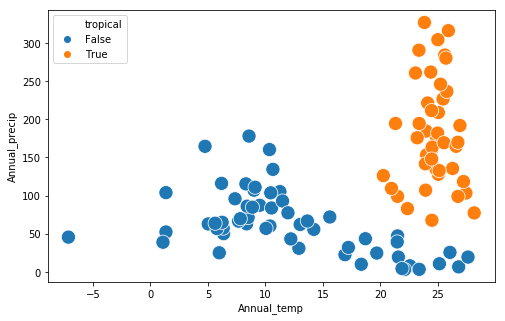

In [7]:
# Plot the training data with and without labels
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual_temp",y="Annual_precip",data=trainData,s=80, legend=None)
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual_temp",y="Annual_precip",hue="tropical",data=trainData,s=200)


In [23]:
# how to ask help on the console
#help(sns.scatterplot)
#pd.read_csv.__doc__
#print(dir(sns.scatterplot))

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


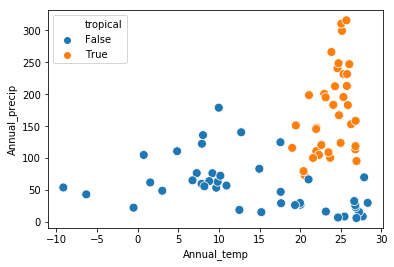

In [24]:
# Load Test data on which the model performance will be evaluated
testData = smallData[100:]
testData.head()
sns.scatterplot(x="Annual_temp",y="Annual_precip",hue="tropical",data=testData,s=80)

In [41]:
#  notice the slice operate / [) is a include and notinclude type
xTrain = trainData.iloc[:,1:-1]
print(trainData.shape)
print(xTrain.shape)
# concatenate is combine function / notice the paremeter axis if =0 means along which the arrays will be joined 
xTrain = np.concatenate((np.ones((xTrain.shape[0],1)), xTrain), axis=1)
xTrain[:5, :]

(100, 4)
(100, 2)


array([[  1.   ,  12.92 ,  31.132],
       [  1.   ,  21.51 ,  99.131],
       [  1.   ,  11.27 , 105.324],
       [  1.   ,  26.83 ,   6.781],
       [  1.   ,  14.22 ,  55.905]])

In [52]:
# Prepare training and test data
xTrain = trainData.iloc[:,1:-1]
nTrain = xTrain.shape[0]

# Add bias as feature to the data
xTrain = np.concatenate( (np.ones((nTrain,1)), xTrain), axis=1)

yTrain = trainData.iloc[:,-1]
# Change labels to +1/-1
yTrain = 2*np.asarray(yTrain,dtype=float)-1

## Process test data
xTest = testData.iloc[:,1:-1]
nTest = xTest.shape[0]

# Add bias as feature to the data
xTest = np.concatenate( ( np.ones((nTest,1)), xTest),axis=1)

yTest = testData.iloc[:,-1]
# Change labels to +1/-1
print(2*np.asarray(yTest,dtype=float))
yTest = 2*np.asarray(yTest,dtype=float)-1
# towara a character, can use the int/float/str to transf the data type
int(yTest[1])

[0. 2. 2. 0. 0. 2. 0. 0. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 0. 0. 0. 0. 0. 0.
 2. 2. 2. 2. 0. 2. 0. 0. 2. 0. 2. 0. 0. 2. 0. 0. 0. 0. 2. 2. 2. 0. 0. 2.
 2. 0. 0. 0. 2. 0. 0. 2. 2. 0. 0. 2. 2. 0. 0. 2. 2. 0. 0. 0. 0. 2. 2. 2.
 2. 2. 0. 0. 2. 0.]


1

## An implementation of the PLA
### Task 1: 
Complete the perceptron module with the PLA prediction model.
pdb is debug package

In [56]:
def perceptron(X,Y):
    
    pdb.set_trace()
    iteration = 0
    nData = len(Y)
    loss = 1.0
    
    # Initialize random weights
    W = np.random.rand(X.shape[1],1)
    
    # Compute initial predictions
    ##### One line update here ####
    #yPred = np.sign(W.T*X) 
    # dot means 点乘 ， reshape 转变矩阵属性， -1 继承远矩阵熟悉
    yPred = np.sign(X.dot(W)).reshape(-1)
    #Zero-One loss
    misClassifiedIdx = np.argwhere(Y != yPred)
    loss = len( misClassifiedIdx )/ nData
    
    while ( loss > 0) & (iteration < 10000): 
        
        # Choose a misclassified sample
        idx = misClassifiedIdx[0]
        # Update Weights / why 
        W = W + (Y[idx]*X[idx,:]).reshape(W.shape)
        # Predict 
        # yPred = 
        yPred =  np.sign(X.dot(W)).reshape(-1)
        # Compute loss
        misClassifiedIdx = np.argwhere(Y != yPred)
        loss = len(misClassifiedIdx)/ nData
    
        iteration += 1
        
    if(loss==0):
        print('Converged at iteration %d' %(iteration))
        print('Model parameters are:')
        print(W)
    else:
        print('Not converged. Max. iterations reached')
    return W, yPred

In [58]:
# Obtain the linear model from PLA

W, pred = perceptron(xTrain, yTrain)

> <ipython-input-56-76e0983d2f02>(4)perceptron()
-> iteration = 0


(Pdb)  c


Converged at iteration 7812
Model parameters are:
[[-2031.94191639]
 [   63.27617615]
 [    7.52711501]]


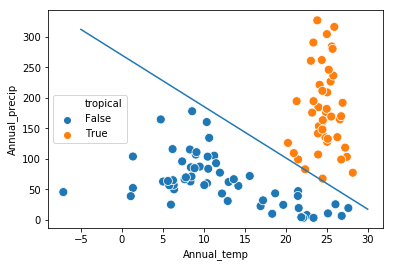

In [59]:
# Plot the training data and the obtained boundary
sns.scatterplot(x="Annual_temp",y="Annual_precip",hue="tropical",data=trainData.iloc[:nTrain,:],s=80)

xx = np.linspace(-5, 30)
yy = - (W[0]+W[1]*xx) / W[2]
sns.lineplot(xx,yy)

### Task2:
Obtain predictions on the test set

In [67]:
# Compute the test set accuracy
print(np.sign(xTest.dot(W)).reshape(-1))
yTestPred = np.sign(xTest.dot(W)).reshape(-1)
loss = np.sum((yTestPred != yTest))/len(yTest)
print(loss)
print("Test Set loss is %f" %loss)

[-1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
 -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.
 -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1. -1.]
0.05128205128205128
Test Set loss is 0.051282


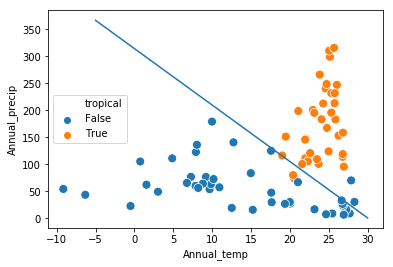

In [60]:
# Visualise the test set and the learnt model
sns.scatterplot(x="Annual_temp",y="Annual_precip",hue="tropical",data=testData,s=80)

xx = np.linspace(-5, 30)
yy = - (W[0]+W[1]*xx) / W[2]
sns.lineplot(xx,yy)

### Task3 :

Check the influence of changing the number of training samples used on the test set accuracy. As there are 100 training samples, plot the influence of number of training samples on the test accuracy by increasing the training samples in steps of 10.

In [ ]:
W, pred = perceptron(xTrain[:5,:], yTrain[:5])
yTestPred = np.sign(xTest.dot(W)).reshape(-1)
loss = np.sum((yTestPred != yTest))/len(yTest)
print(loss)

> <ipython-input-56-76e0983d2f02>(4)perceptron()
-> iteration = 0
